#Pasos para crear un modelo VAR con series temporales multivariantes:

1. Análisis exploratorios de los datos.
2. Dividir la serie en conjuntos de entrenamiento y prueba.
3. Prueba de estacionariedad.
4. Transformar la serie de entrenamiento si es necesario. 
5. Construir un modelo VAR sobre las series transformadas.
6. Causalidad de Granger.
7. Diagnóstico del modelo.
8. Realizar pronósticos utilizando el modelo finalmente elegido.
9. Transformación inversa del pronóstico a la escala original.
10. Realizar una evaluación del pronóstico.

# Los datos: 

Contiene las respuestas de un dispositivo multisensor de gas desplegado sobre el terreno en una ciudad italiana. Los promedios de respuestas por hora se registran junto con referencias de concentraciones de gas de un analizador certificado.

El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de 5 sensores químicos de óxido metálico integrados en un dispositivo multisensor químico para medir la calidad del aire.

Originalmente obtenidos del repositorio UCI Machine Learning:

https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import pandas as pd
df_comp = pd.read_csv("AirQualityUCI.csv", parse_dates=[['Date', 'Time']],sep=';')
df_comp.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004 18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004 19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004 20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004 21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004 22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


# Preprocesado

In [2]:
df_comp = df_comp.drop(['Unnamed: 15'], axis = 1)
df_comp = df_comp.drop(['Unnamed: 16'], axis = 1)

In [3]:
df_comp.tail(116)

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9355,04/04/2005 13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005 14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"
9357,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,nan nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_comp.isnull().sum()

Date_Time        0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [5]:
import numpy as np
np.arange(114)+9357

array([9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367,
       9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378,
       9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389,
       9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400,
       9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411,
       9412, 9413, 9414, 9415, 9416, 9417, 9418, 9419, 9420, 9421, 9422,
       9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9432, 9433,
       9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9442, 9443, 9444,
       9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454, 9455,
       9456, 9457, 9458, 9459, 9460, 9461, 9462, 9463, 9464, 9465, 9466,
       9467, 9468, 9469, 9470])

In [6]:
df_comp=df_comp.drop(np.arange(114)+9357,axis=0)
df_comp.tail()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005 10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005 11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005 12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005 13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
9356,04/04/2005 14.00.00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [8]:
df_comp.dtypes

Date_Time         object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

El tipo de datos de la columna Date_Time es un objeto y necesitamos cambiarlo a datetime. Además, para preparar los datos, necesitamos que el índice tenga fecha y hora. 

In [9]:
df_comp['Date_Time'] = pd.to_datetime(df_comp.Date_Time , format = '%d/%m/%Y %H.%M.%S',errors='coerce')
data = df_comp.drop(['Date_Time'], axis=1)
data.index = df_comp.Date_Time

In [10]:
data.tail()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2005-04-04 10:00:00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
2005-04-04 11:00:00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
2005-04-04 12:00:00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
2005-04-04 13:00:00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"
2005-04-04 14:00:00,"2,2",1071.0,-200.0,"11,9",1047.0,265.0,654.0,168.0,1129.0,816.0,"28,5","13,1","0,5028"


In [11]:
data.shape

(9357, 13)

In [12]:
for i in range(9357):
  data.iloc[i,0]=float(data.iloc[i,0].replace(',','.'))

for i in range(9357):
  data.iloc[i,3]=float(data.iloc[i,3].replace(',','.'))

for i in range(9357):
  data.iloc[i,10]=float(data.iloc[i,10].replace(',','.'))

for i in range(9357):
  data.iloc[i,11]=float(data.iloc[i,11].replace(',','.'))

for i in range(9357):
  data.iloc[i,12]=float(data.iloc[i,12].replace(',','.'))
data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11,60,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [13]:
data.dtypes

CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [14]:
data['CO(GT)'] = data['CO(GT)'].astype(float)
data['C6H6(GT)'] = data['C6H6(GT)'].astype(float)
data['T'] = data['T'].astype(float)
data['RH'] = data['RH'].astype(float)
data['AH'] = data['AH'].astype(float)

In [15]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [16]:
data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

En la descripción de los datos nos dice que algunos valores perdidos fueron sustituidos por el valor -200 así que nosotros vamos a cambiar eso y asignarles el valor inmediatamente anterior.

In [17]:
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
       if data[j][i] == -200:
           data[j][i] = data[j][i-1]

In [18]:
#Save the dataset 
data.to_csv('AirQualityUCI_preproc.csv')

# Análisis exploratorio

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


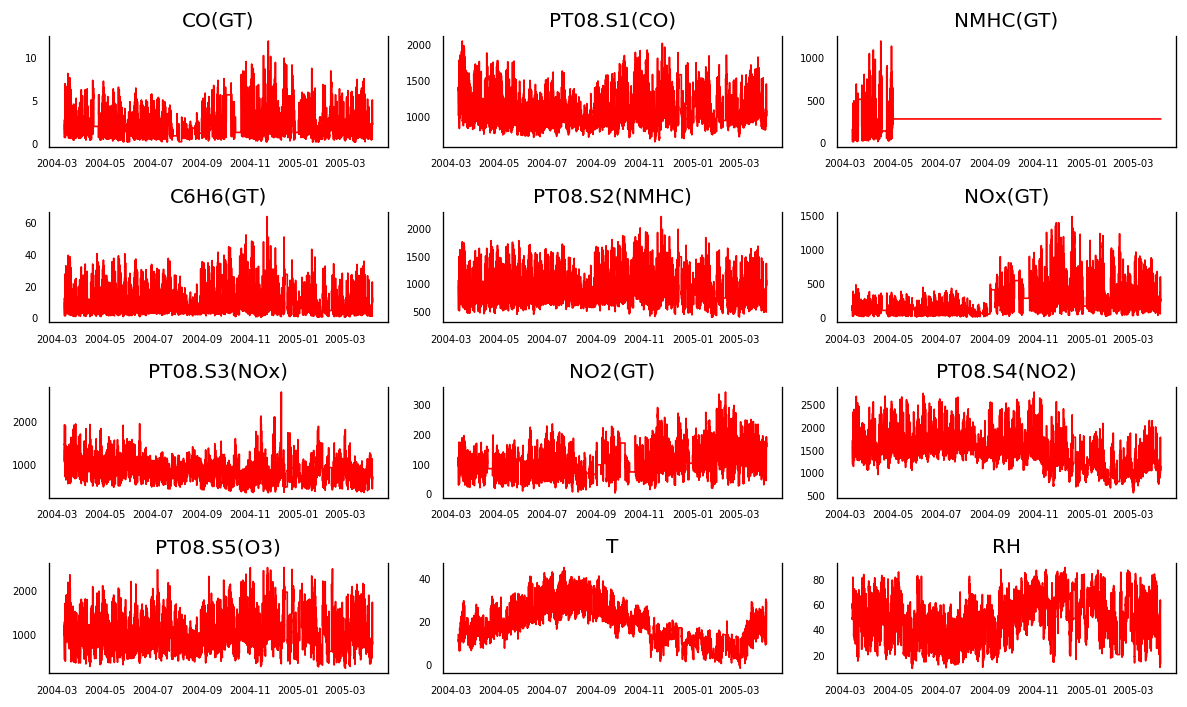

In [19]:
# Visualizando los datos
import seaborn as sb
import matplotlib.pyplot as plt

# Plot
fig, axes = plt.subplots(nrows=4, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    datax = data[data.columns[i]]
    ax.plot(datax, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [20]:
corr=data.corr()
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.763247,0.238429,0.779056,0.769081,0.787863,-0.620435,0.693676,0.512432,0.736989,0.001516,0.041975,0.023296
PT08.S1(CO),0.763247,1.000000,0.239108,0.886325,0.896015,0.644520,-0.777913,0.580919,0.676413,0.901460,0.037046,0.120042,0.121724
NMHC(GT),0.238429,0.239108,1.000000,0.236859,0.237931,0.127834,-0.259475,0.164996,0.179990,0.201575,0.082679,-0.057676,0.060621
C6H6(GT),0.779056,0.886325,0.236859,1.000000,0.982485,0.637626,-0.737702,0.537442,0.756328,0.861688,0.189645,-0.054949,0.155825
PT08.S2(NMHC),0.769081,0.896015,0.237931,0.982485,1.000000,0.626594,-0.798121,0.566391,0.769786,0.876588,0.231083,-0.082087,0.174921
NOx(GT),0.787863,0.644520,0.127834,0.637626,0.626594,1.000000,-0.608068,0.763889,0.194420,0.708762,-0.244068,0.184418,-0.142447
PT08.S3(NOx),-0.620435,-0.777913,-0.259475,-0.737702,-0.798121,-0.608068,1.000000,-0.592228,-0.535264,-0.795958,-0.132851,-0.060581,-0.216738
NO2(GT),0.693676,0.580919,0.164996,0.537442,0.566391,0.763889,-0.592228,1.000000,0.107057,0.633563,-0.194537,-0.098619,-0.338924
PT08.S4(NO2),0.512432,0.676413,0.179990,0.756328,0.769786,0.194420,-0.535264,0.107057,1.000000,0.579192,0.558374,-0.015158,0.630272
PT08.S5(O3),0.736989,0.901460,0.201575,0.861688,0.876588,0.708762,-0.795958,0.633563,0.579192,1.000000,-0.044829,0.137821,0.055483


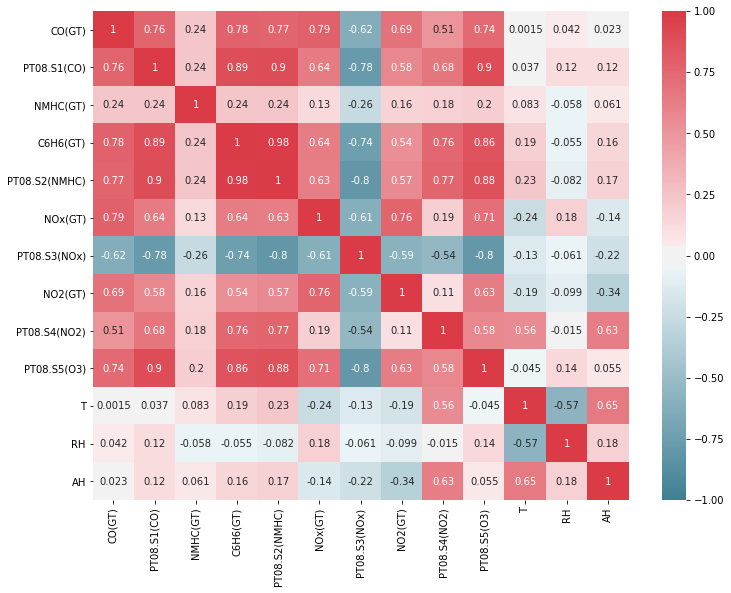

In [21]:
plt.figure(figsize=(12, 9))
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,vmax=1, vmin=-1, cmap =sb.diverging_palette(220, 10, as_cmap=True),center=0 )
plt.show()

# Dividir los datos en conjunto de Entrenamiento y Prueba
El modelo VAR se ajustará al conjunto de entrenamiento X_train y luego se utilizará el modelo para pronosticar las observaciones futuras. Estos pronósticos se compararán con los datos reales del conjunto de prueba.

In [22]:
n_obs=1000
X_train, X_test = data[0:-n_obs], data[-n_obs:]
print(X_train.shape, X_test.shape)

(8357, 13) (1000, 13)


# Prueba de estacionariedad
Necesitamos que los datos sean estacionarios para poder usar el modelo VAR. Vamos a averiguarlo haciendo un Test de Dickey-Fuller aumentado, a cada variable univariante que tiene nuestro dataset.

In [23]:
import statsmodels.tsa.stattools as sts

In [24]:
def augmented_dickey_fuller_statistics(time_series):
  result = sts.adfuller(time_series.values)
  print('p-value: %f' % result[1])

print('Test de Dickey-Fuller Aumentado:')
for i in range(13):
  print('Serie de tiempo Variable',i+1)
  augmented_dickey_fuller_statistics(X_train.iloc[:,i])


Test de Dickey-Fuller Aumentado:
Serie de tiempo Variable 1
p-value: 0.000000
Serie de tiempo Variable 2
p-value: 0.000000
Serie de tiempo Variable 3
p-value: 0.000000
Serie de tiempo Variable 4
p-value: 0.000000
Serie de tiempo Variable 5
p-value: 0.000000
Serie de tiempo Variable 6
p-value: 0.000000
Serie de tiempo Variable 7
p-value: 0.000000
Serie de tiempo Variable 8
p-value: 0.000000
Serie de tiempo Variable 9
p-value: 0.000000
Serie de tiempo Variable 10
p-value: 0.000000
Serie de tiempo Variable 11
p-value: 0.042875
Serie de tiempo Variable 12
p-value: 0.000000
Serie de tiempo Variable 13
p-value: 0.000026


Todos los p-valores son menores que 0.05, con lo cual se rechaza la hipótesis nula de que la serie no es estacionaria. Conclusión: es estacionaria.

# Modelo VAR
VAR requiere la estacionariedad de la serie, lo que significa que la media de la serie no cambia con el tiempo (podemos verlo en el gráfico dibujado junto a la Prueba de Dickey-Fuller aumentada).

In [25]:
from statsmodels.tsa.api import VAR

In [26]:
model = VAR(X_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


## Seleccionando el orden del modelo

In [27]:
modelsel=model.select_order(15)
modelsel.summary()

,AIC,BIC,FPE,HQIC
0,78.84,78.85,1.740e+34,78.85
1,53.05,53.20,1.091e+23,53.10
2,51.84,52.13,3.251e+22,51.94
3,51.67,52.11*,2.746e+22,51.82
4,51.56,52.14,2.469e+22,51.76
5,51.50,52.22,2.323e+22,51.75
6,51.44,52.30,2.180e+22,51.73
7,51.37,52.38,2.043e+22,51.72
8,51.31,52.46,1.916e+22,51.70
9,51.23,52.52,1.776e+22,51.67*


## Ajustando el modelo

In [28]:
res = model.fit(maxlags=15, ic='aic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Sep, 2020
Time:                     12:38:32
--------------------------------------------------------------------
No. of Equations:         13.0000    BIC:                    53.1396
Nobs:                     8342.00    HQIC:                   51.7259
Log likelihood:          -364020.    FPE:                1.39909e+22
AIC:                      50.9926    Det(Omega_mle):     1.03449e+22
--------------------------------------------------------------------
Results for equation CO(GT)
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    -0.189183         0.277653           -0.681           0.496
L1.CO(GT)                 0.761322         0.021388           35.595           0.000
L1.PT08.S1(CO)            0.002697         

# Matriz de causalidad de Granger

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore")
maxlag=15
test = 'ssr_chi2test'
def grangers_causality_matrix(X_train_transformed, variables, test = 'ssr_chi2test', verbose=False):
  dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
  for c in dataset.columns:
    for r in dataset.index:
      test_result = grangercausalitytests(X_train_transformed[[r,c]], maxlag=maxlag, verbose=False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: 
        print(f'Y = {r}, X = {c}, P Values = {p_values}')
      min_p_value = np.min(p_values)
      dataset.loc[r,c] = min_p_value
  dataset.columns = [var + '_x' for var in variables]
  dataset.index = [var + '_y' for var in variables]
  return dataset
grangers_causality_matrix(X_train, variables = X_train.columns)


,CO(GT)_x,PT08.S1(CO)_x,NMHC(GT)_x,C6H6(GT)_x,PT08.S2(NMHC)_x,NOx(GT)_x,PT08.S3(NOx)_x,NO2(GT)_x,PT08.S4(NO2)_x,PT08.S5(O3)_x,T_x,RH_x,AH_x
CO(GT)_y,1.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0371
PT08.S1(CO)_y,0.0000,1.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0002
NMHC(GT)_y,0.0000,0.0,1.0000,0.0,0.0,0.0227,0.0,0.0004,0.0,0.0,0.0,0.0,0.0622
C6H6(GT)_y,0.0000,0.0,0.0000,1.0,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0003
PT08.S2(NMHC)_y,0.0000,0.0,0.0000,0.0,1.0,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
NOx(GT)_y,0.0000,0.0,0.0125,0.0,0.0,1.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
PT08.S3(NOx)_y,0.0000,0.0,0.0000,0.0,0.0,0.0000,1.0,0.0000,0.0,0.0,0.0,0.0,0.0000
NO2(GT)_y,0.0000,0.0,0.0082,0.0,0.0,0.0000,0.0,1.0000,0.0,0.0,0.0,0.0,0.0000
PT08.S4(NO2)_y,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,1.0,0.0,0.0,0.0,0.0000
PT08.S5(O3)_y,0.0000,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,1.0,0.0,0.0,0.0016


# Diagnosis del modelo

## Residuos

In [30]:
residuals=res.resid

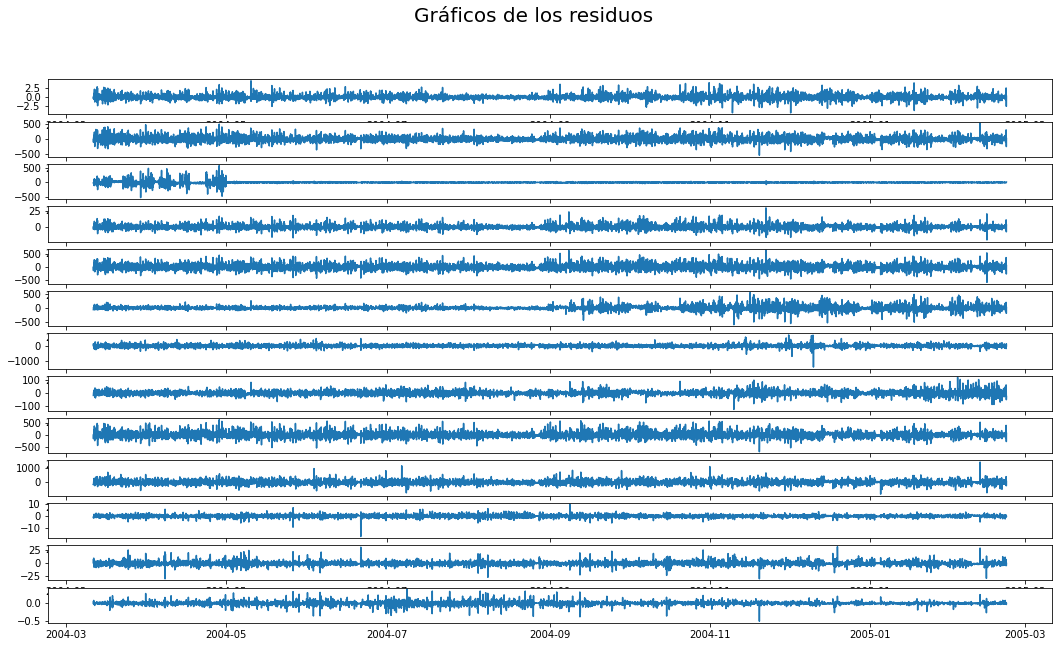

In [31]:
fig, axs = plt.subplots(13)
fig.suptitle('Gráficos de los residuos',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(residuals.iloc[:,i]) for i in range(13)]
plt.show()

## Dickey - Fuller a los residuos

In [32]:
print('ADF de los Residuos, p-valores:')
[sts.adfuller(residuals.iloc[:,i])[1] for i in range(13)]


ADF de los Residuos, p-valores:


[2.0724900208928038e-23,
 5.282068250553449e-23,
 1.4170286397684612e-18,
 1.5117228566055788e-21,
 1.3457195746926548e-21,
 1.5679730957895322e-26,
 2.1384111810817186e-24,
 2.777408304781435e-25,
 3.0984463807698616e-22,
 5.907837437641356e-25,
 1.4405413443774666e-26,
 3.417178002684989e-29,
 0.0]

Todos los p-valores son < 0.05 por tanto se rechaza la hipótesis nula de que las 13 series de residuos no son estacionarias, por lo cual con un 95% de confianza se cree que son estacionarias. 

Conclusión: Los residuos del modelo no presentan estructura de autocorrelación, son estacionarios según los resultados de la prueba de Dickey - Fuller aumentada y en los gráficos se puede comprobar esto visualmente, entonces puede concluirse que son ruido blanco como es deseable.

## Valores predichos

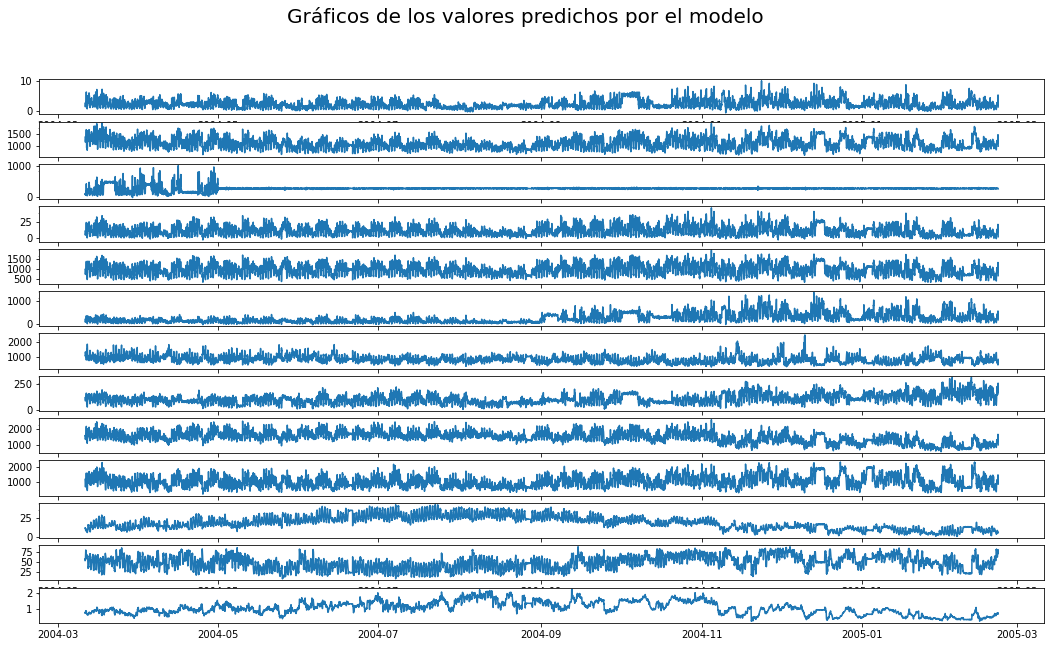

In [33]:
y_fitted = res.fittedvalues
fig, axs = plt.subplots(13)
fig.suptitle('Gráficos de los valores predichos por el modelo',fontsize=20)
fig.set_size_inches(18, 10)
[axs[i].plot(y_fitted.iloc[:,i]) for i in range(13)]
plt.show()

# Pronósticos a futuro

## Hallando los pronósticos

Para pronosticar, al modelo VAR le podemos pasar hasta el número de orden de retraso de observaciones de los datos pasados. Esto se debe a que los términos en el modelo VAR son esencialmente los retrasos de las diversas series de tiempo en el conjunto de datos, por lo que debemos proporcionar tantos valores anteriores como lo indique el orden de retraso utilizado por el modelo. De lo contrario estaríamos introduciendo poca fiabilidad.


In [34]:
# Obtener el numero para hacer forecast
lag_order = n_obs

# Input data para hacer forecasting (pronósticos a futuro)
input_data = X_train.values[-lag_order:]
# Forecasting
pred = res.forecast(y=input_data, steps=n_obs)
pred = (pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred'))
print('Predicciones:')
pred

Predicciones:


,CO(GT)_pred,PT08.S1(CO)_pred,NMHC(GT)_pred,C6H6(GT)_pred,PT08.S2(NMHC)_pred,NOx(GT)_pred,PT08.S3(NOx)_pred,NO2(GT)_pred,PT08.S4(NO2)_pred,PT08.S5(O3)_pred,T_pred,RH_pred,AH_pred
Date_Time,,,,,,,,,,,,,
2005-02-21 23:00:00,1.201938,1015.088570,277.329658,3.763390,701.830763,164.619265,871.855325,129.138021,1071.774050,858.335428,5.105276,72.623856,0.661154
2005-02-22 00:00:00,1.131163,1014.654558,258.371287,3.999790,715.889670,144.590490,871.468026,121.820867,1085.307965,833.306948,4.788250,72.580187,0.651076
2005-02-22 01:00:00,1.211514,1017.637708,243.059886,4.989400,745.186480,138.149336,863.768205,118.459890,1119.075953,847.976535,4.391579,72.390374,0.638229
2005-02-22 02:00:00,1.086944,1006.597476,242.745576,3.897227,717.088332,163.062307,874.755301,124.942818,1093.884509,833.930984,4.038385,72.530568,0.647001
2005-02-22 03:00:00,1.330016,1026.856319,249.561056,4.927458,739.548337,183.387909,879.192693,128.675780,1127.504312,863.389113,3.522228,72.819034,0.652863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,2.197499,1117.427952,269.550955,10.336536,946.068119,269.459043,837.495384,114.748841,1403.856291,1066.478940,15.837839,50.570510,0.916403
2005-04-04 11:00:00,2.197404,1117.409176,269.553235,10.336720,946.077140,269.429537,837.490084,114.740057,1403.940322,1066.447136,15.841413,50.568519,0.916565
2005-04-04 12:00:00,2.197310,1117.390440,269.555512,10.336905,946.086162,269.400078,837.484786,114.731287,1404.024243,1066.415387,15.844983,50.566528,0.916727


<Figure size 864x720 with 0 Axes>

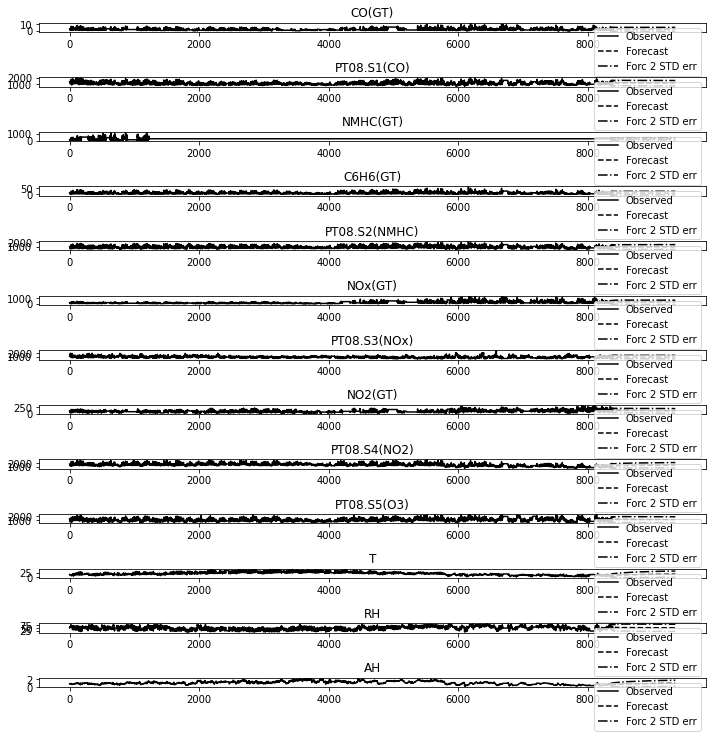

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
res.plot_forecast(lag_order)
plt.tight_layout(h_pad = 1.15)
plt.show()

In [36]:
pred.columns=X_test.columns
pred

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2005-02-21 23:00:00,1.201938,1015.088570,277.329658,3.763390,701.830763,164.619265,871.855325,129.138021,1071.774050,858.335428,5.105276,72.623856,0.661154
2005-02-22 00:00:00,1.131163,1014.654558,258.371287,3.999790,715.889670,144.590490,871.468026,121.820867,1085.307965,833.306948,4.788250,72.580187,0.651076
2005-02-22 01:00:00,1.211514,1017.637708,243.059886,4.989400,745.186480,138.149336,863.768205,118.459890,1119.075953,847.976535,4.391579,72.390374,0.638229
2005-02-22 02:00:00,1.086944,1006.597476,242.745576,3.897227,717.088332,163.062307,874.755301,124.942818,1093.884509,833.930984,4.038385,72.530568,0.647001
2005-02-22 03:00:00,1.330016,1026.856319,249.561056,4.927458,739.548337,183.387909,879.192693,128.675780,1127.504312,863.389113,3.522228,72.819034,0.652863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,2.197499,1117.427952,269.550955,10.336536,946.068119,269.459043,837.495384,114.748841,1403.856291,1066.478940,15.837839,50.570510,0.916403
2005-04-04 11:00:00,2.197404,1117.409176,269.553235,10.336720,946.077140,269.429537,837.490084,114.740057,1403.940322,1066.447136,15.841413,50.568519,0.916565
2005-04-04 12:00:00,2.197310,1117.390440,269.555512,10.336905,946.086162,269.400078,837.484786,114.731287,1404.024243,1066.415387,15.844983,50.566528,0.916727


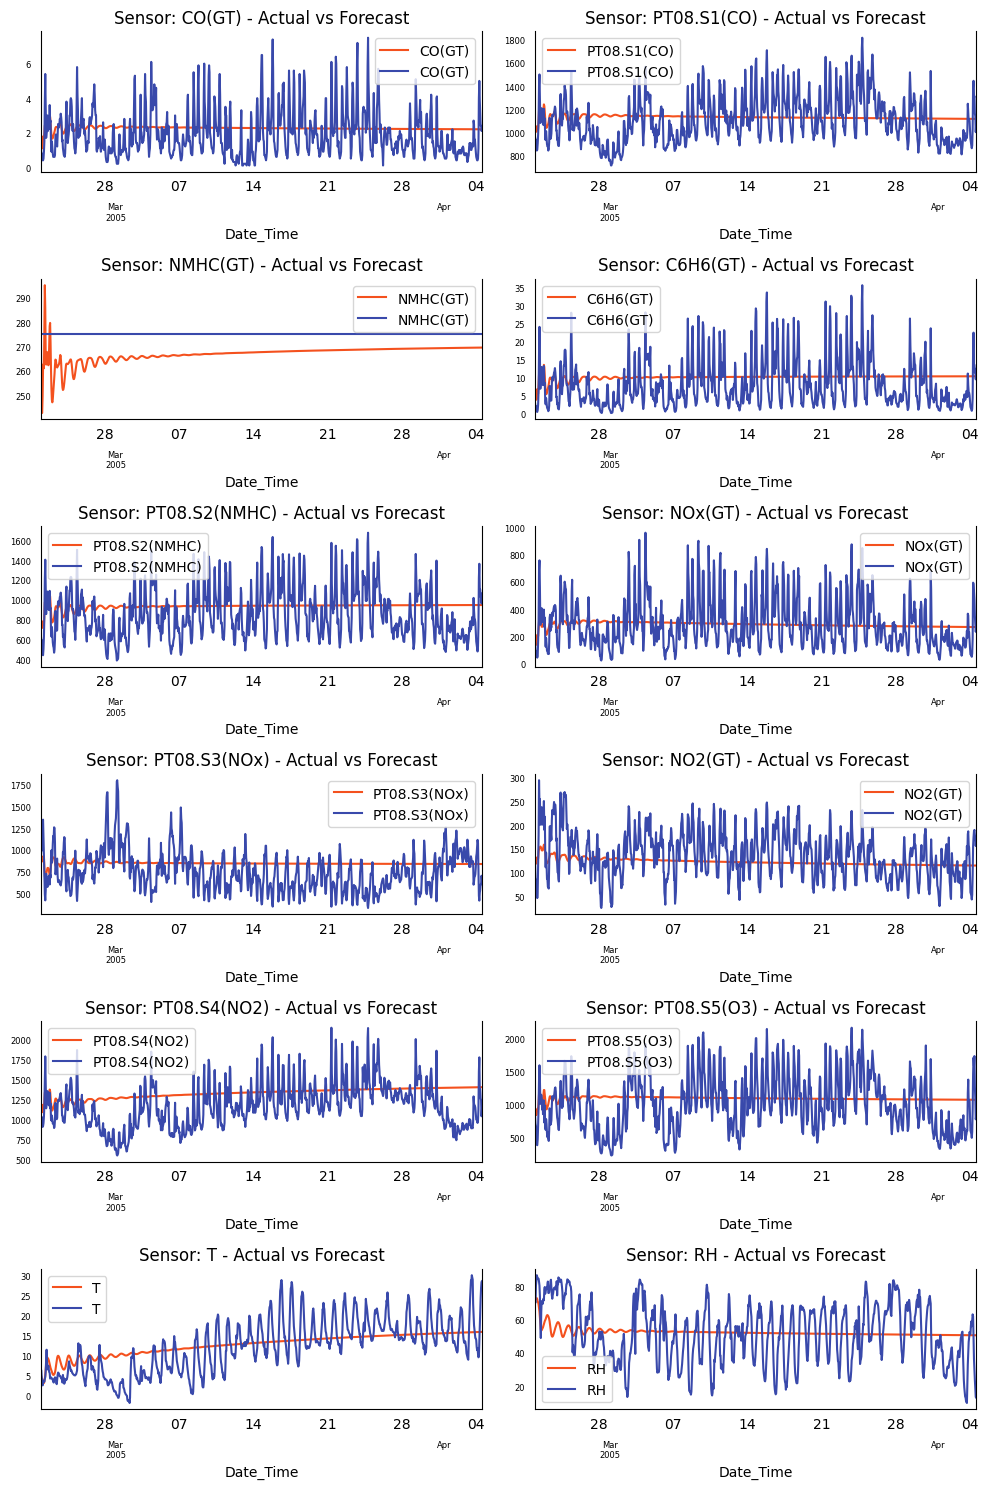

In [37]:
# Actual vs Forecasted Plots
fig, axes = plt.subplots(nrows = int(len(X_train.columns)/2), ncols = 2, dpi = 100, figsize = (10,15))

for i, (col,ax) in enumerate(zip(X_train.columns, axes.flatten())):
    pred[col].plot(color = '#F4511E', legend = True, ax = ax).autoscale(axis =' x',tight = True)
    X_test[col].plot(color = '#3949AB', legend = True, ax = ax)

    ax.set_title('Sensor: ' + col + ' - Actual vs Forecast')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize = 6)

plt.tight_layout()
plt.savefig('actual_forecast.png')
plt.show()


# Evaluando el modelo

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
cols=data.columns
for i in cols:
    print('RMSE value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], X_test[i])))


RMSE value for CO(GT) is :  1.3497861939471598
RMSE value for PT08.S1(CO) is :  198.18213944976094
RMSE value for NMHC(GT) is :  8.63326971453233
RMSE value for C6H6(GT) is :  6.619137674291262
RMSE value for PT08.S2(NMHC) is :  256.02704835589043
RMSE value for NOx(GT) is :  177.9579741749253
RMSE value for PT08.S3(NOx) is :  242.3721793948399
RMSE value for NO2(GT) is :  48.6192521920686
RMSE value for PT08.S4(NO2) is :  302.3526130319361
RMSE value for PT08.S5(O3) is :  419.38378237166467
RMSE value for T is :  5.1295048718742375
RMSE value for RH is :  17.192375077727664
RMSE value for AH is :  0.22634063968292037
